In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/113 國道智慧交通競賽_新/code/LightGBM/第二版資料前處理與建模/112年1-10月交通事故簡訊通報資料_資料前處理.xlsx').drop(columns=['Unnamed: 0'])
df.head()

,日期,事件發生時,事件發生分,國道名稱,方向,里程,事件發生,交控中心\n接獲通報,CCTV\n監看現場,CMS\n發布資訊,...,level,km,source,大型車數量,小型車數量,其他,事件排除時,事件排除分,假期與工作,處理分鐘
0,2023-02-09,19,21,國道3號,0,54.0,19:21:00,0,0,0,...,3,1.0,0,0,2,0,20,2,工作日,41
1,2023-02-10,3,36,國道1號,0,6.0,03:36:00,0,0,0,...,3,0.0,1,0,1,0,4,51,週五,75
2,2023-02-10,5,33,國道3號,0,76.0,05:33:00,0,0,0,...,3,0.0,0,1,1,0,5,53,週五,20
3,2023-02-10,7,35,國道3號,1,98.0,07:35:00,0,0,0,...,3,0.0,0,0,2,0,7,44,週五,9
4,2023-02-10,7,52,國道1號,1,23.0,07:52:00,0,0,0,...,3,1.2,1,0,2,0,8,8,週五,16


In [8]:
# 處理日期特徵
df['日期'] = pd.to_datetime(df['日期'])
df['年份'] = df['日期'].dt.year
df['月份'] = df['日期'].dt.month
df['日'] = df['日期'].dt.day

df['翻覆事故\n註記'] = pd.to_numeric(df['翻覆事故\n註記'], errors='coerce').fillna(0)
#df = df.drop(columns=['Unnamed: 0'])
df.head()

,日期,事件發生時,事件發生分,國道名稱,方向,里程,事件發生,交控中心\n接獲通報,CCTV\n監看現場,CMS\n發布資訊,...,大型車數量,小型車數量,其他,事件排除時,事件排除分,假期與工作,處理分鐘,年份,月份,日
0,2023-02-09,19,21,國道3號,0,54.0,19:21:00,0,0,0,...,0,2,0,20,2,工作日,41,2023,2,9
1,2023-02-10,3,36,國道1號,0,6.0,03:36:00,0,0,0,...,0,1,0,4,51,週五,75,2023,2,10
2,2023-02-10,5,33,國道3號,0,76.0,05:33:00,0,0,0,...,1,1,0,5,53,週五,20,2023,2,10
3,2023-02-10,7,35,國道3號,1,98.0,07:35:00,0,0,0,...,0,2,0,7,44,週五,9,2023,2,10
4,2023-02-10,7,52,國道1號,1,23.0,07:52:00,0,0,0,...,0,2,0,8,8,週五,16,2023,2,10


In [ ]:
#!pip install lightgbm

In [9]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_absolute_error


X = df.drop(columns=['處理分鐘', '日期'])
y = df['處理分鐘']

In [10]:
X

,事件發生時,事件發生分,國道名稱,方向,里程,事件發生,交控中心\n接獲通報,CCTV\n監看現場,CMS\n發布資訊,交控中心\n通報工務段,...,source,大型車數量,小型車數量,其他,事件排除時,事件排除分,假期與工作,年份,月份,日
0,19,21,國道3號,0,54.0,19:21:00,0,0,0,0,...,0,0,2,0,20,2,工作日,2023,2,9
1,3,36,國道1號,0,6.0,03:36:00,0,0,0,0,...,1,0,1,0,4,51,週五,2023,2,10
2,5,33,國道3號,0,76.0,05:33:00,0,0,0,0,...,0,1,1,0,5,53,週五,2023,2,10
3,7,35,國道3號,1,98.0,07:35:00,0,0,0,0,...,0,0,2,0,7,44,週五,2023,2,10
4,7,52,國道1號,1,23.0,07:52:00,0,0,0,0,...,1,0,2,0,8,8,週五,2023,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26731,9,35,國道1號,0,23.0,09:35:00,0,0,0,0,...,4,0,1,0,9,48,工作日,2023,8,8
26732,9,44,國道3號,0,34.0,09:44:00,0,0,0,0,...,4,0,2,0,9,51,工作日,2023,8,8
26733,9,43,國道1號,1,6.0,09:43:00,0,0,0,0,...,10,0,2,0,9,59,工作日,2023,8,8
26734,9,42,國道1號,0,39.4,09:42:00,0,0,0,0,...,1,0,2,0,10,0,工作日,2023,8,8


In [16]:
X.columns

Index(['事件發生時', '事件發生分', '國道名稱', '方向', '里程', '事件發生', '交控中心\n接獲通報',
       'CCTV\n監看現場', 'CMS\n發布資訊', '交控中心\n通報工務段', '事故處理\n小組出發', '事故處理\n小組抵達',
       '事故處理\n小組完成', '事件排除', '事故類型', '死亡', '受傷', '內路肩', '內車道', '中內車道', '中車道',
       '中外車道', '外車道', '外路肩', '匝道', '翻覆事故\n註記', '施工事故\n註記', '危險物品車輛\n註記',
       '車輛起火\n註記', '冒煙車事故\n註記', '主線中斷\n註記', '分局', 'level', 'km', 'source',
       '大型車數量', '小型車數量', '其他', '事件排除時', '事件排除分', '假期與工作', '年份', '月份', '日'],
      dtype='object')

In [ ]:
params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'verbose': -1
}

dataset = lgb.Dataset(X, label=y)

# Perform cross-validation
cv_results = lgb.cv(
    params,
    dataset,
    num_boost_round=2000,
    nfold=5,
    metrics='mae',
    seed=42
)

# Extract the best number of boosting rounds
best_num_boost_round = len(cv_results['valid l1-mean'])
print(f'Best number of boosting rounds: {best_num_boost_round}')
print(f'Best CV MAE: {cv_results["valid l1-mean"][-1]}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best number of boosting rounds: 2000
Best CV MAE: 7.376602352221674


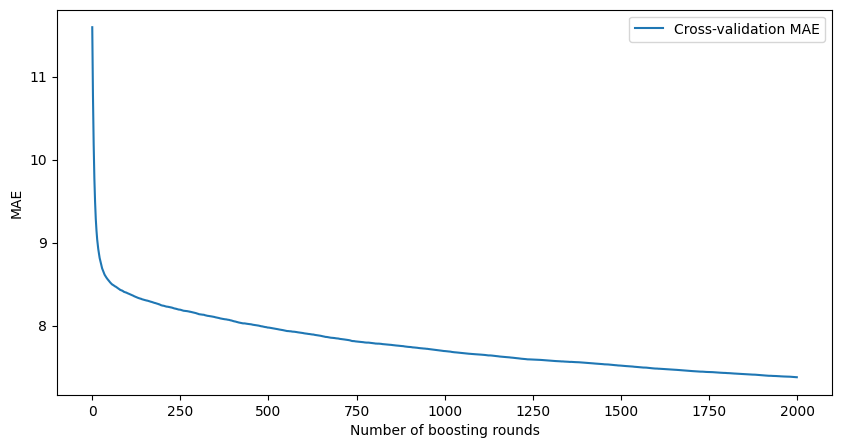

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(cv_results['valid l1-mean'], label='Cross-validation MAE')
plt.xlabel('Number of boosting rounds')
plt.ylabel('MAE')
plt.legend()
plt.show()

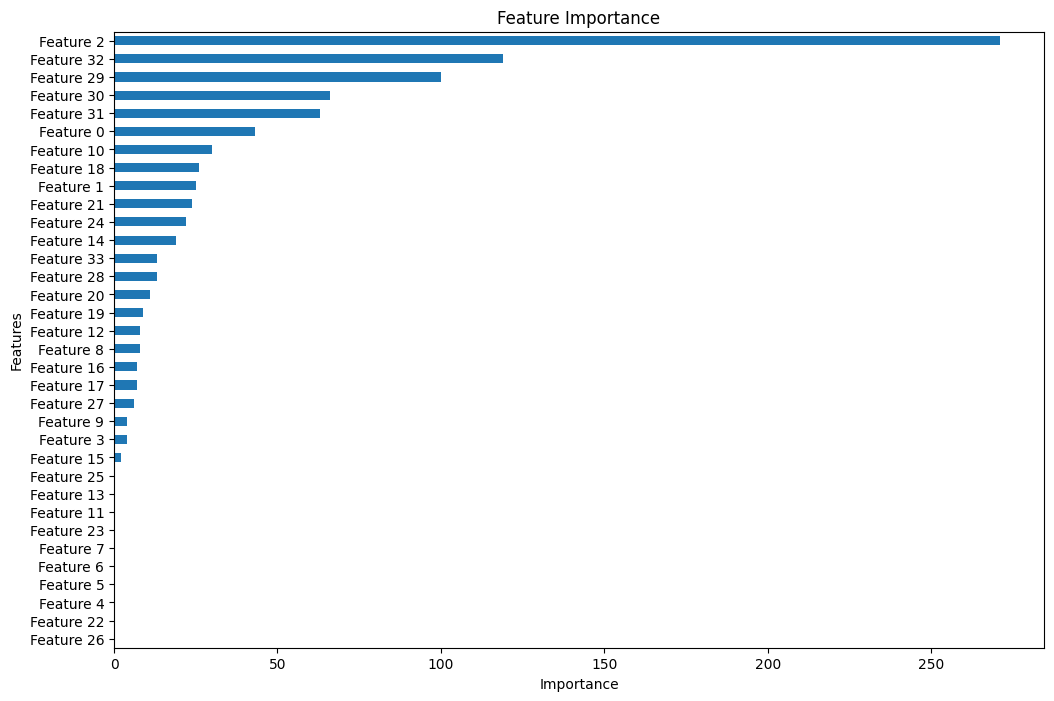

In [ ]:
plt.rcParams['font.family'] = 'DejaVu Sans'  # or any other available font
feature_importances = pd.Series(gbm.feature_importance(), index=[f'Feature {i}' for i in range(X.shape[1])])#plt無法顯示中文

# 繪製特徵重要性圖
plt.figure(figsize=(12, 8))
feature_importances.sort_values(ascending=True).plot(kind='barh')  # 使用水平條形圖
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
df = pd.read_excel('/content/drive/My Drive/traffic_2.xlsx')
df.head()

,Unnamed: 0,日期,事件發生時,事件發生分,國道名稱,方向,里程,事件發生,交控中心\n接獲通報,CCTV\n監看現場,...,車輛10,車輛11,車輛12,分局,level,km,source,事件排除時,事件排除分,假期
0,0,2023-02-09,19,21,0,0,54.0,19:21:00,0,0,...,0,0,0,1,3,1,0,20,2,工作日
1,1,2023-02-10,3,36,1,0,6.0,03:36:00,0,0,...,0,0,0,1,3,0,1,4,51,週五
2,2,2023-02-10,5,33,0,0,76.0,05:33:00,0,0,...,0,0,0,1,3,0,0,5,53,週五
3,3,2023-02-10,7,35,0,1,98.0,07:35:00,0,0,...,0,0,0,1,3,0,0,7,44,週五
4,4,2023-02-10,7,52,1,1,23.0,07:52:00,0,0,...,0,0,0,1,3,NaN,1,8,8,週五


In [ ]:
df = pd.read_excel('/content/drive/My Drive/traffic_2.xlsx')
df['日期'] = pd.to_datetime(df['日期'])  # Convert to datetime if not already
df.set_index('日期', inplace=True)
df.head()

,Unnamed: 0,事件發生時,事件發生分,國道名稱,方向,里程,事件發生,交控中心\n接獲通報,CCTV\n監看現場,CMS\n發布資訊,...,車輛10,車輛11,車輛12,分局,level,km,source,事件排除時,事件排除分,假期
日期,,,,,,,,,,,,,,,,,,,,,
2023-02-09,0,19,21,0,0,54.0,19:21:00,0,0,0,...,0,0,0,1,3,1,0,20,2,Weekday
2023-02-10,1,3,36,1,0,6.0,03:36:00,0,0,0,...,0,0,0,1,3,0,1,4,51,Friday
2023-02-10,2,5,33,0,0,76.0,05:33:00,0,0,0,...,0,0,0,1,3,0,0,5,53,Friday
2023-02-10,3,7,35,0,1,98.0,07:35:00,0,0,0,...,0,0,0,1,3,0,0,7,44,Friday
2023-02-10,4,7,52,1,1,23.0,07:52:00,0,0,0,...,0,0,0,1,3,NaN,1,8,8,Friday


Time Series Split Average MAE: 9.799877091680937


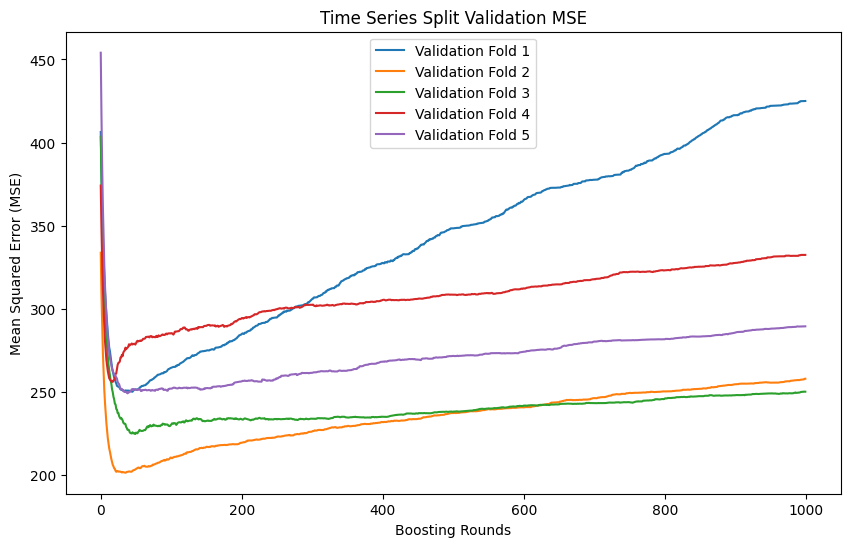

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5)
tss_scores = []
tss_training_metrics = []
tss_validation_metrics = []

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    evals_result = {}
    model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[train_data, test_data],
                      valid_names=['train', 'valid'],
                      callbacks=[lgb.record_evaluation(evals_result)])

    y_pred = model.predict(X_test, num_iteration=model.best_iteration)
    tss_scores.append(mean_absolute_error(y_test, y_pred))
    tss_training_metrics.append(evals_result['train']['l2'])
    tss_validation_metrics.append(evals_result['valid']['l2'])

print(f'Time Series Split Average MAE: {np.mean(tss_scores)}')

plt.figure(figsize=(10, 6))
for i in range(len(tss_training_metrics)):
    plt.plot(tss_validation_metrics[i], label=f'Validation Fold {i+1}')
plt.xlabel('Boosting Rounds')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('Time Series Split Validation MSE')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20551 (\N{CJK UNIFIED IDEOGRAPH-5047}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


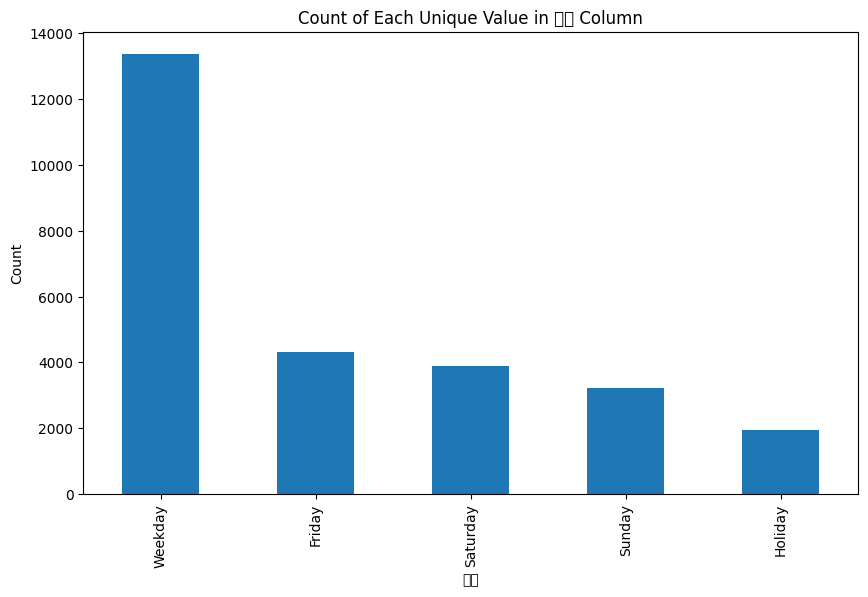

In [ ]:
df = pd.read_excel('/content/drive/My Drive/traffic_2.xlsx')

holiday_mapping = {
    '工作日': 'Weekday',
    '週五': 'Friday',
    '週六': 'Saturday',
    '週日': 'Sunday',
    '節日': 'Holiday'
}

# Apply the mapping to the '假期' column
df['假期'] = df['假期'].map(holiday_mapping)

plt.figure(figsize=(10, 6))
df['假期'].value_counts().plot(kind='bar')
plt.xlabel('假期')
plt.ylabel('Count')
plt.title('Count of Each Unique Value in 假期 Column')
plt.show()

df['翻覆事故\n註記'] = pd.to_numeric(df['翻覆事故\n註記'], errors='coerce').fillna(0)
df = df.drop(columns=['Unnamed: 0'])
X = df.drop(columns=['處理分鐘', '日期'])
y = df['處理分鐘']

Average MAE: 8.014512834878495


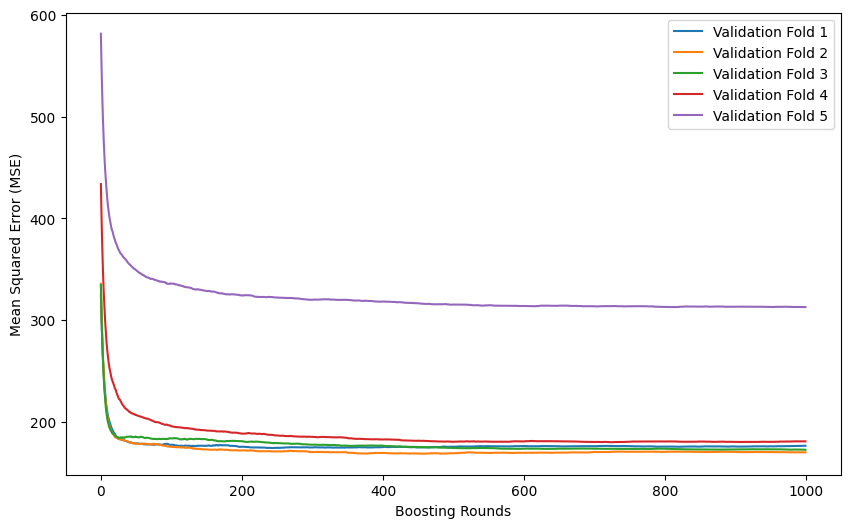

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set the parameters for the LightGBM model
params = {
    'objective': 'regression',
    'metric': 'mse',  # Train using Mean Squared Error
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'verbose': -1
}



mae_scores = []
training_metrics = []
validation_metrics = []

# Perform stratified cross-validation
for train_index, test_index in skf.split(X, df['假期']):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a LightGBM dataset
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    # Train the model
    evals_result = {'train': [], 'valid': []}
    model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[train_data, test_data],
                      valid_names=['train', 'valid'],
                      callbacks=[lgb.record_evaluation(evals_result)])

    # Predict on the test set
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    # Calculate MAE and store the result
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    # Store the metrics
    training_metrics.append(evals_result['train']['l2'])  # l2 refers to MSE
    validation_metrics.append(evals_result['valid']['l2'])

# Calculate the average MAE across all folds
average_mae = sum(mae_scores) / len(mae_scores)
print(f'Average MAE: {average_mae}')

# Plot training and validation metrics
plt.figure(figsize=(10, 6))
for i in range(len(training_metrics)):
    plt.plot(validation_metrics[i], label=f'Validation Fold {i+1}')
plt.xlabel('Boosting Rounds')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

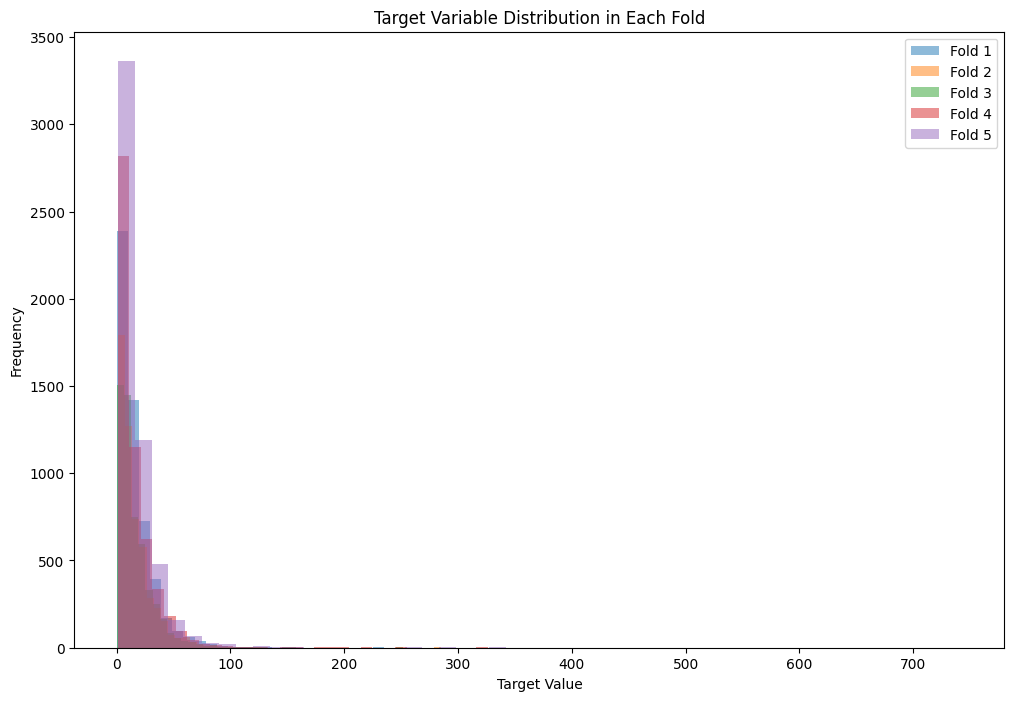

In [ ]:
fold_indices = list(skf.split(X, df['假期']))

fold_distributions = []
for i, (train_index, test_index) in enumerate(fold_indices):
    fold_distributions.append(y.iloc[test_index])

plt.figure(figsize=(12, 8))
for i, dist in enumerate(fold_distributions):
    plt.hist(dist, bins=50, alpha=0.5, label=f'Fold {i+1}')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Target Variable Distribution in Each Fold')
plt.show()

#各fold的y分布大致相同